In [415]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [416]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [417]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [418]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Значения категориальных переменные

In [419]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [420]:
y_train = train.Survived.copy()
X_train = train.copy()

In [421]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [422]:
X_train.drop('Survived', axis=1, inplace=True)

In [423]:
X_test = test.copy()

In [424]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [425]:
X_train['is_test'] = 0
X_test['is_test'] = 1

In [426]:
df = pd.concat([X_train, X_test])

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
is_test        1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [428]:
object_vars=[var for var in df if df[var].dtype=='object']
numerical_vars=[var for var in df if df[var].dtype=='int64' or df[var].dtype=='float64']
for var in object_vars:
    print(df[var].value_counts())

Connolly, Miss. Kate                                     2
Kelly, Mr. James                                         2
Willer, Mr. Aaron (Abi Weller")"                         1
Dean, Miss. Elizabeth Gladys Millvina""                  1
Francatelli, Miss. Laura Mabel                           1
Smyth, Miss. Julia                                       1
Smart, Mr. John Montgomery                               1
Harmer, Mr. Abraham (David Lishin)                       1
O'Sullivan, Miss. Bridget Mary                           1
Kink, Miss. Maria                                        1
Salonen, Mr. Johan Werner                                1
Sirayanian, Mr. Orsen                                    1
Balkic, Mr. Cerin                                        1
Hanna, Mr. Mansour                                       1
Lehmann, Miss. Bertha                                    1
Spencer, Mr. William Augustus                            1
Ryerson, Mr. Arthur Larned                              

In [429]:
df.Sex.value_counts(dropna=False)

male      843
female    466
Name: Sex, dtype: int64

# Обработка категориальных переменных

In [430]:
object_vars

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [431]:
object_vars = ['Name', 'Sex']

In [432]:
def get_one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [433]:
columns_to_get_counts = ['Embarked']

In [434]:
df = get_one_hot(df,columns_to_get_counts)

In [435]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_test', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [436]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in object_vars:
    le.fit( df[var] )
    df[var]=  le.transform( df[var])


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null int32
Sex            1309 non-null int32
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
is_test        1309 non-null int64
Embarked_C     1309 non-null uint8
Embarked_Q     1309 non-null uint8
Embarked_S     1309 non-null uint8
dtypes: float64(2), int32(2), int64(5), object(3), uint8(3)
memory usage: 126.6+ KB


# Нормализация числовых переменных

In [438]:
numerical_vars=[var for var in df if df[var].dtype=='int64' or df[var].dtype=='float64' or df[var].dtype=='int32']
numerical_vars

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'is_test']

In [439]:
numerical_vars = [
    col for col in set(numerical_vars)
    if col not in set(
        ['is_test'        
        ]
                    )
]
numerical_vars

['PassengerId', 'Sex', 'Name', 'Parch', 'Pclass', 'SibSp', 'Fare', 'Age']

In [440]:
for var in numerical_vars:
    df[var] =     (df[var]-df[var].min())/(df[var].max()-df[var].min())

In [441]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.118683,1.0,0.273456,0.125,0.0,A/5 21171,0.014151,NaN,S,0,0,0,1
1,0.000765,0.0,0.218989,0.0,0.473882,0.125,0.0,PC 17599,0.139136,C85,C,0,1,0,0
2,0.001529,1.0,0.400459,0.0,0.323563,0.000,0.0,STON/O2. 3101282,0.015469,NaN,S,0,0,0,1
3,0.002294,0.0,0.323124,0.0,0.436302,0.125,0.0,113803,0.103644,C123,S,0,0,0,1
4,0.003058,1.0,0.016845,1.0,0.436302,0.000,0.0,373450,0.015713,NaN,S,0,0,0,1


In [442]:
df.drop(['Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [443]:
X_train = df[df.is_test==0].drop('is_test', axis=1)
X_test = df[df.is_test==1].drop('is_test', axis=1)

In [444]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.118683,1.0,0.273456,0.125,0.0,0.014151,0,0,1
1,0.000765,0.0,0.218989,0.0,0.473882,0.125,0.0,0.139136,1,0,0
2,0.001529,1.0,0.400459,0.0,0.323563,0.000,0.0,0.015469,0,0,1
3,0.002294,0.0,0.323124,0.0,0.436302,0.125,0.0,0.103644,0,0,1
4,0.003058,1.0,0.016845,1.0,0.436302,0.000,0.0,0.015713,0,0,1


In [445]:
from sklearn.preprocessing import Imputer

In [446]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

C:\Users\rajah\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [447]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [448]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.118683,1.0,0.273456,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.000765,0.0,0.218989,0.0,0.473882,0.125,0.000000,0.139136,1.0,0.0,0.0
2,0.001529,1.0,0.400459,0.0,0.323563,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.002294,0.0,0.323124,0.0,0.436302,0.125,0.000000,0.103644,0.0,0.0,1.0
4,0.003058,1.0,0.016845,1.0,0.436302,0.000,0.000000,0.015713,0.0,0.0,1.0
5,0.003823,1.0,0.626340,1.0,0.369900,0.000,0.000000,0.016510,0.0,1.0,0.0
6,0.004587,0.0,0.587289,1.0,0.674308,0.000,0.000000,0.101229,0.0,0.0,1.0
7,0.005352,1.0,0.699847,1.0,0.022924,0.375,0.111111,0.041136,0.0,0.0,1.0
8,0.006116,1.0,0.463247,0.0,0.336089,0.000,0.222222,0.021731,0.0,0.0,1.0
9,0.006881,0.5,0.648545,0.0,0.173243,0.125,0.000000,0.058694,1.0,0.0,0.0


In [449]:
imputer.fit(X_test)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [450]:
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
X_test_imputed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.681193,1.0,0.488515,1.0,0.430039,0.000,0.000000,0.015282,0.0,1.0,0.0
1,0.681957,1.0,0.969372,0.0,0.586622,0.125,0.000000,0.013663,0.0,0.0,1.0
2,0.682722,0.5,0.640888,1.0,0.774521,0.000,0.000000,0.018909,0.0,1.0,0.0
3,0.683486,1.0,0.978560,1.0,0.336089,0.000,0.000000,0.016908,0.0,0.0,1.0
4,0.684251,1.0,0.415773,0.0,0.273456,0.125,0.111111,0.023984,0.0,0.0,1.0
5,0.685015,1.0,0.888208,1.0,0.173243,0.000,0.000000,0.018006,0.0,0.0,1.0
6,0.685780,1.0,0.199847,0.0,0.373669,0.000,0.000000,0.014891,0.0,1.0,0.0
7,0.686544,0.5,0.141654,1.0,0.323563,0.125,0.111111,0.056604,0.0,0.0,1.0
8,0.687309,1.0,0.006891,0.0,0.223350,0.000,0.000000,0.014110,1.0,0.0,0.0
9,0.688073,1.0,0.235835,1.0,0.260929,0.250,0.000000,0.047138,0.0,0.0,1.0


In [451]:
imputer.fit(df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [452]:
df_imputed = imputer.transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_imputed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,is_test,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.118683,1.0,0.273456,0.125,0.000000,0.014151,0.0,0.0,0.0,1.0
1,0.000765,0.0,0.218989,0.0,0.473882,0.125,0.000000,0.139136,0.0,1.0,0.0,0.0
2,0.001529,1.0,0.400459,0.0,0.323563,0.000,0.000000,0.015469,0.0,0.0,0.0,1.0
3,0.002294,0.0,0.323124,0.0,0.436302,0.125,0.000000,0.103644,0.0,0.0,0.0,1.0
4,0.003058,1.0,0.016845,1.0,0.436302,0.000,0.000000,0.015713,0.0,0.0,0.0,1.0
5,0.003823,1.0,0.626340,1.0,0.372180,0.000,0.000000,0.016510,0.0,0.0,1.0,0.0
6,0.004587,0.0,0.587289,1.0,0.674308,0.000,0.000000,0.101229,0.0,0.0,0.0,1.0
7,0.005352,1.0,0.699847,1.0,0.022924,0.375,0.111111,0.041136,0.0,0.0,0.0,1.0
8,0.006116,1.0,0.463247,0.0,0.336089,0.000,0.222222,0.021731,0.0,0.0,0.0,1.0
9,0.006881,0.5,0.648545,0.0,0.173243,0.125,0.000000,0.058694,0.0,1.0,0.0,0.0


# Отбор переменных

In [453]:
corr = X_train_imputed.corr()
corr

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.035144,-0.037882,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Pclass,-0.035144,1.000000,0.052644,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Name,-0.037882,0.052644,1.000000,0.021256,0.058231,-0.017345,-0.049639,-0.048917,0.001142,0.016845,-0.014293
Sex,0.042939,0.131900,0.021256,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,0.033207,-0.331339,0.058231,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.027121
SibSp,-0.057527,0.083081,-0.017345,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.018443,-0.049639,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,-0.549500,-0.048917,-0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,-0.001205,-0.243292,0.001142,-0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.221009,0.016845,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


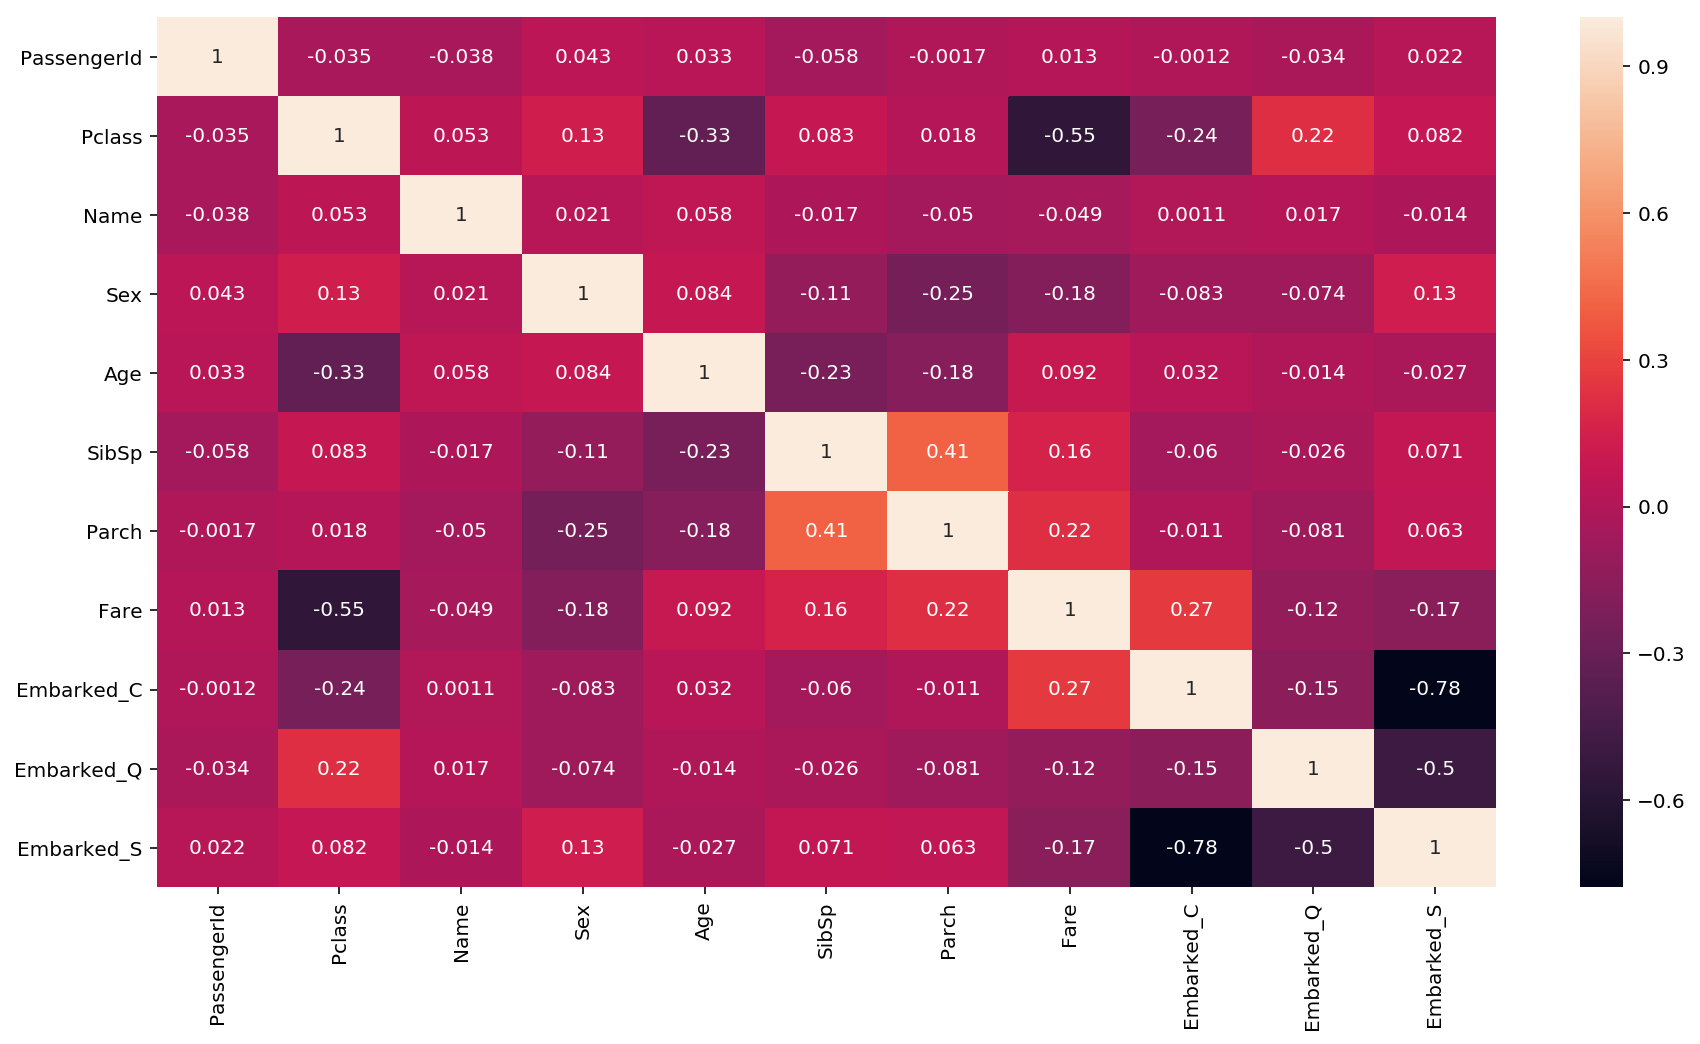

In [454]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Все переменные значимы

# PCA

In [455]:
from sklearn.decomposition import PCA

In [456]:
pca = PCA(n_components=4)

In [457]:
ppl = pca.fit_transform(df_imputed)

In [458]:
pca.explained_variance_ratio_.sum()

0.8060118442888647

In [459]:
ppl.shape

(1309, 4)

## можно обучить дерево на этих переменных, но будет менее информативно

# Обучение дерева

In [460]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [461]:
clf = DecisionTreeClassifier()

In [462]:
clf.fit(X_train_imputed, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [463]:
clf.predict(X_test_imputed)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

# Кросс-валидация

In [464]:
kfold = 10 #количество подвыборок для валидации
itog_val = {} #список для записи результатов кросс валидации разных алгоритмов

clf = AdaBoostClassifier(n_estimators=70)    
scores = cross_val_score(clf, X_train_imputed, y_train, cv=kfold)
itog_val['AdaBoostClassifier'] = scores.mean()
print ('итог', itog_val)
clf.fit(X_train_imputed, y_train)
clf.score(X_train_imputed, y_train)
#y_test_predicted = clf.predict(X_test)
#print ('AdaBoostClassifier first 9 predicted values:\n', y_test_predicted[:9])

итог {'AdaBoostClassifier': 0.72971569628873}


0.8574635241301908

# Визуализация графов

In [465]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [466]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_imputed, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [467]:
get_tree_dot_view(clf, X_train_imputed.columns )

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass <= 0.75\ngini = 0.383\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Name <= 0.986\ngini = 0.1\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="gini = 0.09\nsamples = 169\nvalue = [8, 161]", fillcolor="#399de5f2"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
2 -> 4 ;
5 [label="Fare <= 0.046\ngini = 0.5\nsamples = 144\nvalue = [72, 72]", fillcolor="#e5813900"] ;
1 -> 5 ;
6 [label="gini = 0.484\nsamples = 117\nvalue = [48, 69]", fillcolor="#399de54e"] ;
5 -> 6 ;
7 [label="gini = 0.198\nsamples = 27\nvalue = [24, 3]", fillcolor="#e58139df"] ;
5 -> 7 ;
8 [label="Age <= 0.079\ngini = 0.306\nsamples = 577\nvalue = [468, 109]", fillcolor="#e58139c4"] ;
0 -> 8 [

In [468]:
get_tree_dot_view?

# Визуализация pydot

In [469]:
from sklearn.externals.six import StringIO  
import pydot

#clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_imputed, y_train)
export_graphviz(clf,    out_file='tree.dot')
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

In [470]:
type(graph)

pydot.Dot

### файлик с графом в папке Git